In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# 200bp (>= 6 CpG) (not used)

In [33]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/CpG_frequency/200bp')
freq_df_dict_same = {}
for kmer in ['CpG'] :
    freq_df_dict_same[kmer] = {}
    for group in ['universalCHM_IAPEz_overlap', 'universalCHM_specific'] :
        df = pd.read_csv(f'{group}_6CpG200bp_{kmer}.RegionNum.bed', header = None, 
                                                       names = ['#chrom', 'start', 'end', 'Kmer_Name', 'Mean_Kmer_Ratio', 'Higher_Ratio_Strand', 'CHM_name',],
                                                       sep = "\t")
        freq_df_dict_same[kmer][group] = df.groupby(['CHM_name']).mean().reset_index()[['CHM_name', 'Mean_Kmer_Ratio']]
    
freq_df_dict_same[kmer][group]

,CHM_name,Mean_Kmer_Ratio
0,universalCHM_specific-1,0.048333
1,universalCHM_specific-10,0.042500
2,universalCHM_specific-100,0.039500
3,universalCHM_specific-101,0.043333
4,universalCHM_specific-102,0.045000
...,...,...
700,universalCHM_specific-95,0.045294
701,universalCHM_specific-96,0.038571
702,universalCHM_specific-97,0.057500
703,universalCHM_specific-98,0.033333


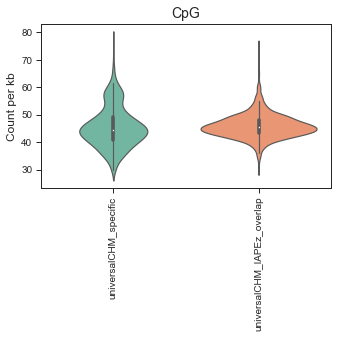

In [34]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(figsize = (6.4 * .75, 4.8 * 1), tight_layout = True)
    for i,kmer in enumerate(['CpG']) :
        ax = axes
        df = pd.DataFrame()
        for group in ['universalCHM_IAPEz_overlap', 'universalCHM_specific'][::-1] :
            df = pd.concat([df, freq_df_dict_same[kmer][group][['CHM_name', 'Mean_Kmer_Ratio']]], axis = 0)
            
        df[['Type', 'group']] = df['CHM_name'].str.split('-', expand = True)[[1,0]]
        df['frequency_per_kb'] = df['Mean_Kmer_Ratio'] * 1000
        sns.violinplot(data = df,
                       x = 'group',
                       y = 'frequency_per_kb',
                       ax = ax,
                       palette = 'Set2'
                      )
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        ax.set_title(f'{kmer}')
        ax.set_ylabel("Count per kb")
        ax.set_xlabel("")
#         if kmer == 'CpG' :
#             scale1 = 25
#             scale2 = 75
#         else :
#             scale1 = 0
#             scale2 = 5
#         ax.set_ylim(scale1, scale2)

    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make15_violin_universalCHM_IAPEzint_CpG_freq_200bpAdd.pdf')
         

In [35]:
from scipy import stats
kmer = 'CpG'
df = pd.DataFrame()
for group in ['universalCHM_IAPEz_overlap', 'universalCHM_specific'][::-1] :
    df = pd.concat([df, freq_df_dict_same[kmer][group][['CHM_name', 'Mean_Kmer_Ratio']]], axis = 0)

df[['Type', 'group']] = df['CHM_name'].str.split('-', expand = True)[[1,0]]
df['frequency_per_kb'] = df['Mean_Kmer_Ratio'] * 1000

In [36]:
### universal CHM specific v.s. universal CHM overlap IAP

res = stats.mannwhitneyu(df.loc[df['group'] == 'universalCHM_specific']['frequency_per_kb'], 
                   df.loc[df['group'] == 'universalCHM_IAPEz_overlap']['frequency_per_kb'], 
                   alternative = 'two-sided',
                   use_continuity = True
                  )
print('universalCHM_specific', 'universalCHM_IAPEz_overlap', res)

universalCHM_specific universalCHM_IAPEz_overlap MannwhitneyuResult(statistic=622822.0, pvalue=4.037635281391197e-05)


# total region

In [41]:
freq_df_dict_total = {}
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/CpG_frequency/total_region')
for kmer in ['CpG'] :
    freq_df_dict_total[kmer] = {}
    for group in ['IAPEz_specific', 'IAPEz_universalCHM_overlap', 'universalCHM_IAPEz_overlap', 'universalCHM_specific'] :
        df = pd.read_csv(f'{group}_{kmer}.bed', header = 0,
                                                       sep = "\t")
        df['region_name'] = df['Kmer_Name'].str.split('.', expand = True)[0]
        df['region_num'] = df['Kmer_Name'].str.split('.', expand = True)[1].str.split("_", expand = True)[1]
        freq_df_dict_total[kmer][group] = df[['region_name', 'region_num', 'Mean_Kmer_Ratio']]
        
    
freq_df_dict_total[kmer][group]

,region_name,region_num,Mean_Kmer_Ratio
0,CG_universalCHM_specific,1,0.040000
1,CG_universalCHM_specific,2,0.040800
2,CG_universalCHM_specific,3,0.027083
3,CG_universalCHM_specific,4,0.023056
4,CG_universalCHM_specific,5,0.024615
...,...,...,...
700,CG_universalCHM_specific,701,0.026500
701,CG_universalCHM_specific,702,0.032000
702,CG_universalCHM_specific,703,0.060952
703,CG_universalCHM_specific,704,0.034167


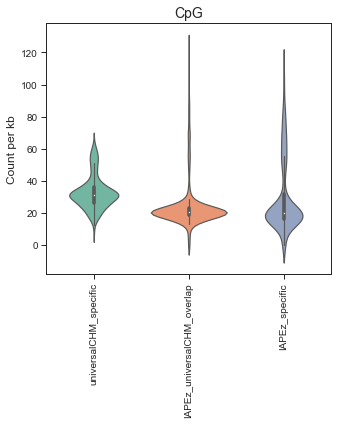

In [64]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(figsize = (6.4 * .75, 4.8 * 1.25), tight_layout = True)
    for i,kmer in enumerate(['CpG']) :
        ax = axes
        df = pd.DataFrame()
        for group in ['IAPEz_specific', 'IAPEz_universalCHM_overlap', 'universalCHM_specific'][::-1] :
#         for group in ['IAPEz_specific', 'IAPEz_universalCHM_overlap', 'universalCHM_IAPEz_overlap', 'universalCHM_specific'][::-1] :
            df = pd.concat([df, freq_df_dict_total[kmer][group][['region_name', 'region_num', 'Mean_Kmer_Ratio']]], axis = 0)
            
        df['frequency_per_kb'] = df['Mean_Kmer_Ratio'] * 1000
        sns.violinplot(data = df,
                       x = 'region_name',
                       y = 'frequency_per_kb',
                       ax = ax,
                       palette = 'Set2'
                      )
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels([x.get_text()[3:] for x in ax.get_xticklabels()], rotation = 90)
        ax.set_title(f'{kmer}')
        ax.set_ylabel("Count per kb")
        ax.set_xlabel("")
#         if kmer == 'CpG' :
#             scale1 = 25
#             scale2 = 75
#         else :
#             scale1 = 0
#             scale2 = 5
#         ax.set_ylim(scale1, scale2)

    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make15_violin_universalCHM_IAPEzint_CpG_freq_totalRegion.pdf')
         

## mannwhitneyu test

In [60]:
from scipy import stats
kmer = 'CpG'
df = pd.DataFrame()
for group in ['IAPEz_specific', 'IAPEz_universalCHM_overlap', 'universalCHM_IAPEz_overlap', 'universalCHM_specific'][::-1] :
    df = pd.concat([df, freq_df_dict_total[kmer][group][['region_name', 'region_num', 'Mean_Kmer_Ratio']]], axis = 0)

df['frequency_per_kb'] = df['Mean_Kmer_Ratio'] * 1000

In [61]:
### 3 others v.s. IAP specific

for group in ['IAPEz_universalCHM_overlap', 'universalCHM_IAPEz_overlap', 'universalCHM_specific'][::-1] :
    res = stats.mannwhitneyu(df.loc[df['region_name'] == f'CG_{group}']['frequency_per_kb'], 
                       df.loc[df['region_name'] == 'CG_IAPEz_specific']['frequency_per_kb'], 
                       alternative = 'two-sided',
                       use_continuity = True
                      )
    print(group, 'IAPEz_specific', res)

universalCHM_specific IAPEz_specific MannwhitneyuResult(statistic=560766.5, pvalue=1.6672877961720143e-51)
universalCHM_IAPEz_overlap IAPEz_specific MannwhitneyuResult(statistic=1481037.0, pvalue=8.294575401848019e-56)
IAPEz_universalCHM_overlap IAPEz_specific MannwhitneyuResult(statistic=1551365.0, pvalue=0.008268235088518861)


In [63]:
### 3 others v.s. universal CHM specific

for group in ['IAPEz_specific', 'IAPEz_universalCHM_overlap', 'universalCHM_IAPEz_overlap'][::-1] :
    res = stats.mannwhitneyu(df.loc[df['region_name'] == f'CG_{group}']['frequency_per_kb'], 
                       df.loc[df['region_name'] == 'CG_universalCHM_specific']['frequency_per_kb'], 
                       alternative = 'two-sided',
                       use_continuity = True
                      )
    print(group, 'universalCHM_specific', res)

universalCHM_IAPEz_overlap universalCHM_specific MannwhitneyuResult(statistic=327770.5, pvalue=1.3476275213088471e-96)
IAPEz_universalCHM_overlap universalCHM_specific MannwhitneyuResult(statistic=320338.5, pvalue=5.833708869211418e-157)
IAPEz_specific universalCHM_specific MannwhitneyuResult(statistic=229538.5, pvalue=1.6672877961720143e-51)
